###IMPORT LIBRARY

In [785]:
# import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

###IMPORT DATASET

In [786]:
df = pd.read_csv('survey_lung_cancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [787]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

**Columns Description:**

Gender: Male or Fale

1. Age: Usia
2. Smoking
3. Yellow Finger
4. Anxiety
5. Peer Presure
6. Chronic Disease
7. Fatigue
8. Allergy
9. Wheezing
10. Alchohol Consuming
11. Coughing
12. Shortness of Breath
13. Swallowing Difficulty
14. Chest Pain
15. Lung Cancer (Target)


###CHECK DATA NULL

In [788]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

###DATA OUTLINE

In [789]:
lung_test = df['LUNG_CANCER'].value_counts()

# Access the count of 'Yes' and 'No'
lung_y = lung_test[0]
lung_n = lung_test[1]

print("Count of 'Yes':", lung_y)
print("Count of 'No':", lung_n)

Count of 'Yes': 270
Count of 'No': 39


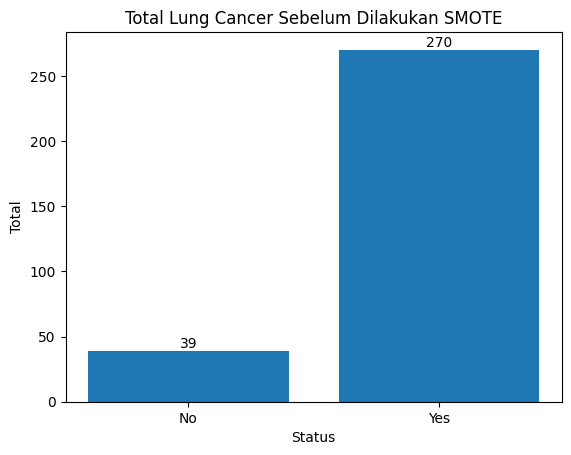

In [790]:
# Create a bar plot
plt.bar(['No', 'Yes'], [lung_n, lung_y])
plt.xlabel('Status')
plt.ylabel('Total')
plt.title('Total Lung Cancer Sebelum Dilakukan SMOTE')

# Add value labels on top of each bar
plt.text(0, lung_n, str(lung_n), ha='center', va='bottom')
plt.text(1, lung_y, str(lung_y), ha='center', va='bottom')

# Display the plot
plt.show()

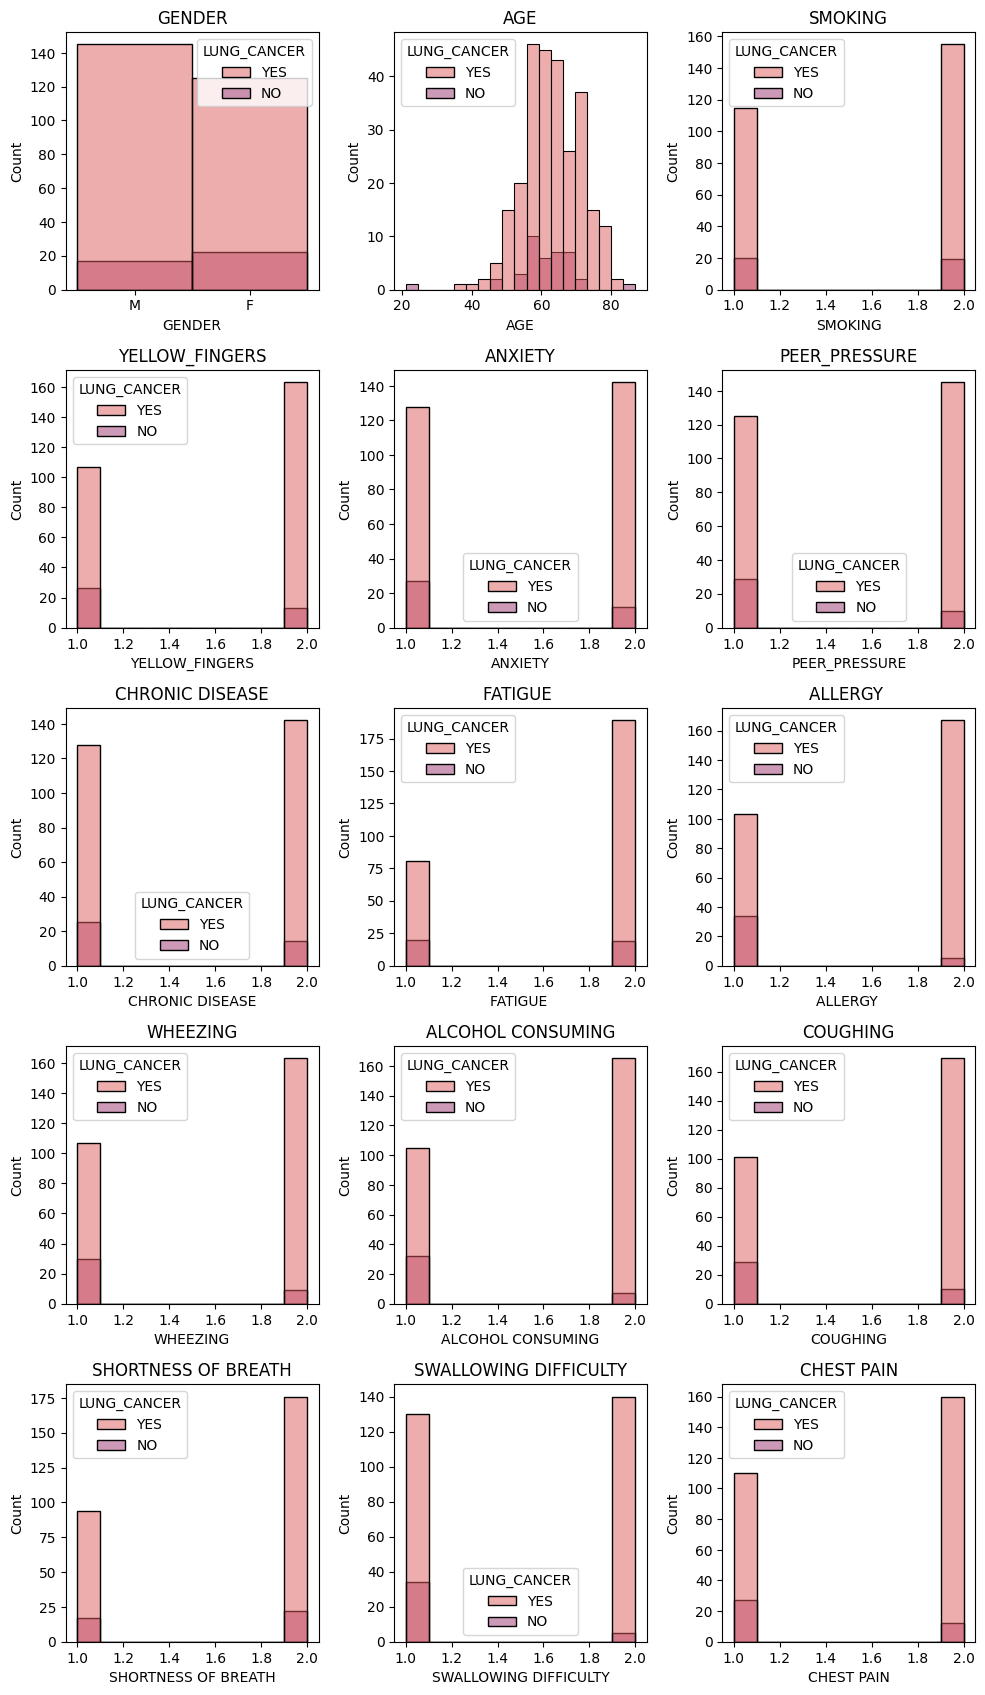

In [791]:
list_column = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']

fig = plt.figure(figsize=(10,20))

for i in range(len(list_column)):
    plt.subplot(6, 3, i+1)
    plt.title(list_column[i])
    sns.histplot(data = df, x = df[list_column[i]], hue='LUNG_CANCER', palette='flare')

plt.tight_layout()

###LABEL ENCODER

In [792]:
df['GENDER'].replace(['M', 'F'], [0, 1], inplace=True)
df['LUNG_CANCER'].replace(['NO', 'YES'], [0, 1], inplace=True)


<Axes: >

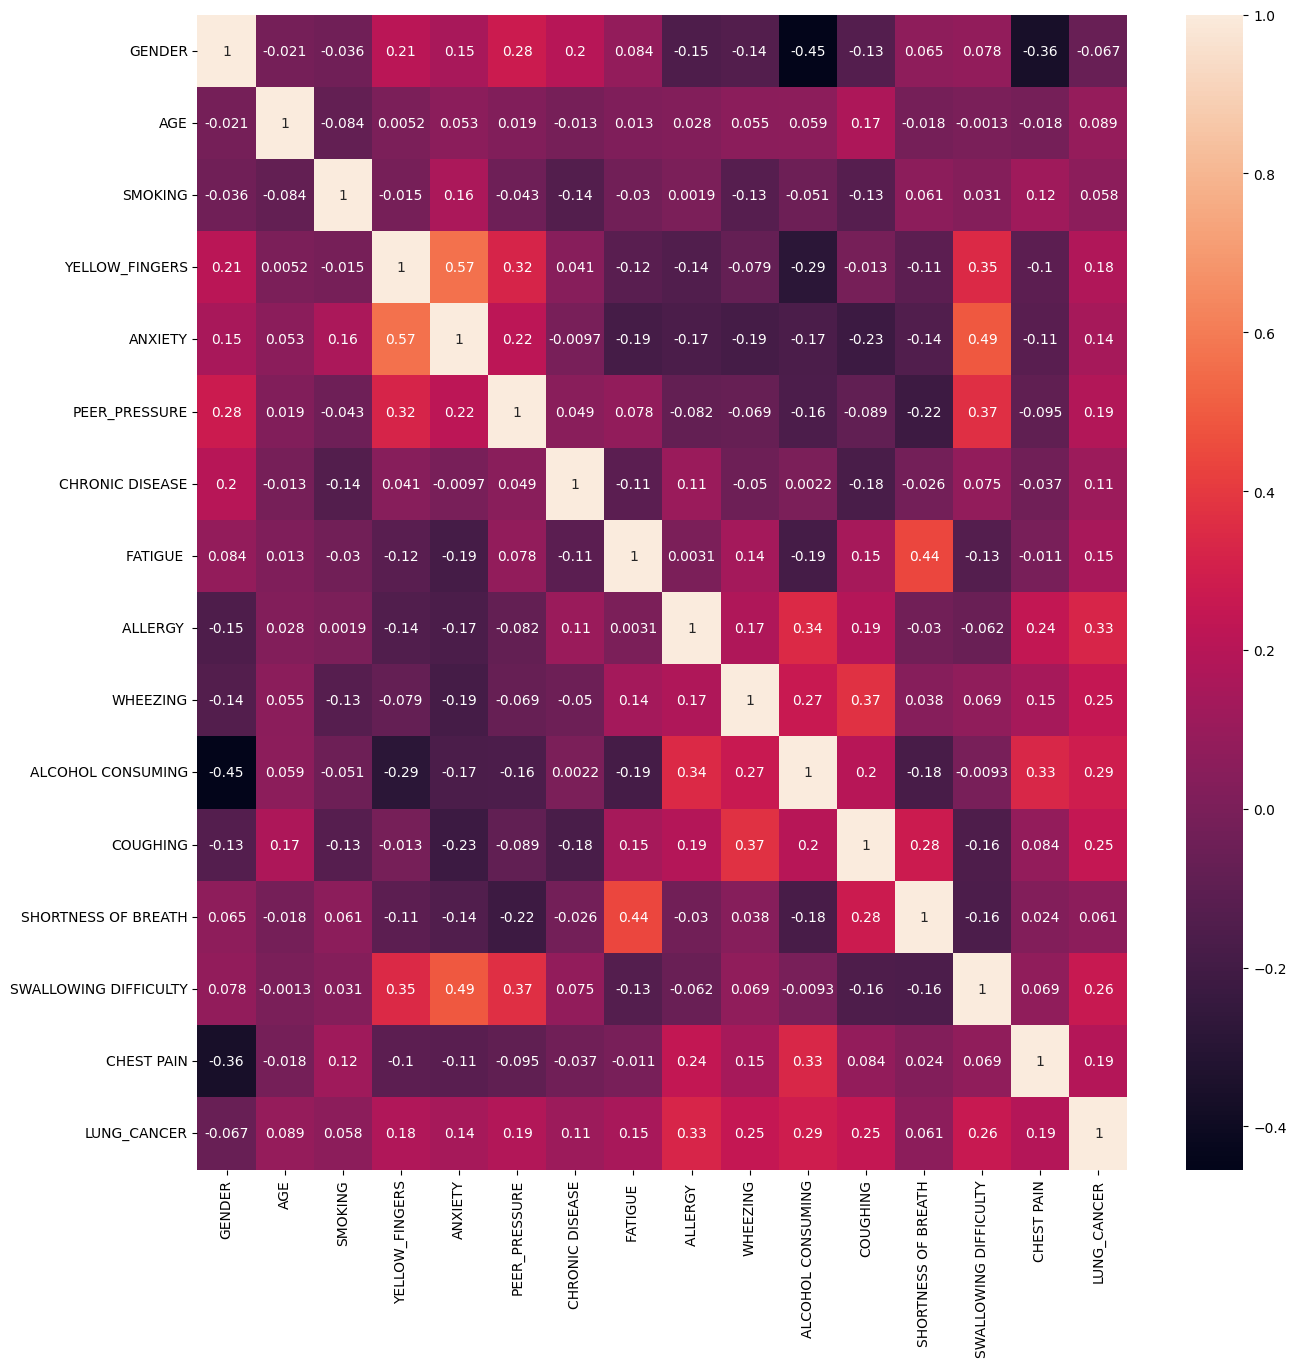

In [793]:
plt.figure(figsize = (15,15))
# sns.heatmap(data.corr(), annot=True, cbar=True, cmap='Blues', fmt='.1f');

sns.heatmap(df.corr(), annot=True, fmt='.2g')

In [794]:
df = df.drop(['SMOKING', 'SHORTNESS OF BREATH'], axis=1)

###DROP DUPLICATE DATA

In [795]:
df.drop_duplicates(inplace=True)
df

,GENDER,AGE,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,2,2,1,1,2,1,2,2,2,2,2,1
1,0,74,1,1,1,2,2,2,1,1,1,2,2,1
2,1,59,1,1,2,1,2,1,2,1,2,1,2,0
3,0,63,2,2,1,1,1,1,1,2,1,2,2,0
4,1,63,2,1,1,1,1,1,2,1,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,59,2,2,2,1,1,2,2,1,2,2,1,1
280,1,59,1,1,1,2,2,2,1,1,1,1,1,0
281,0,55,1,1,1,1,2,2,1,1,1,1,2,0
282,0,46,2,2,1,1,1,1,1,1,1,2,2,0


###HANDLING OUTLIER

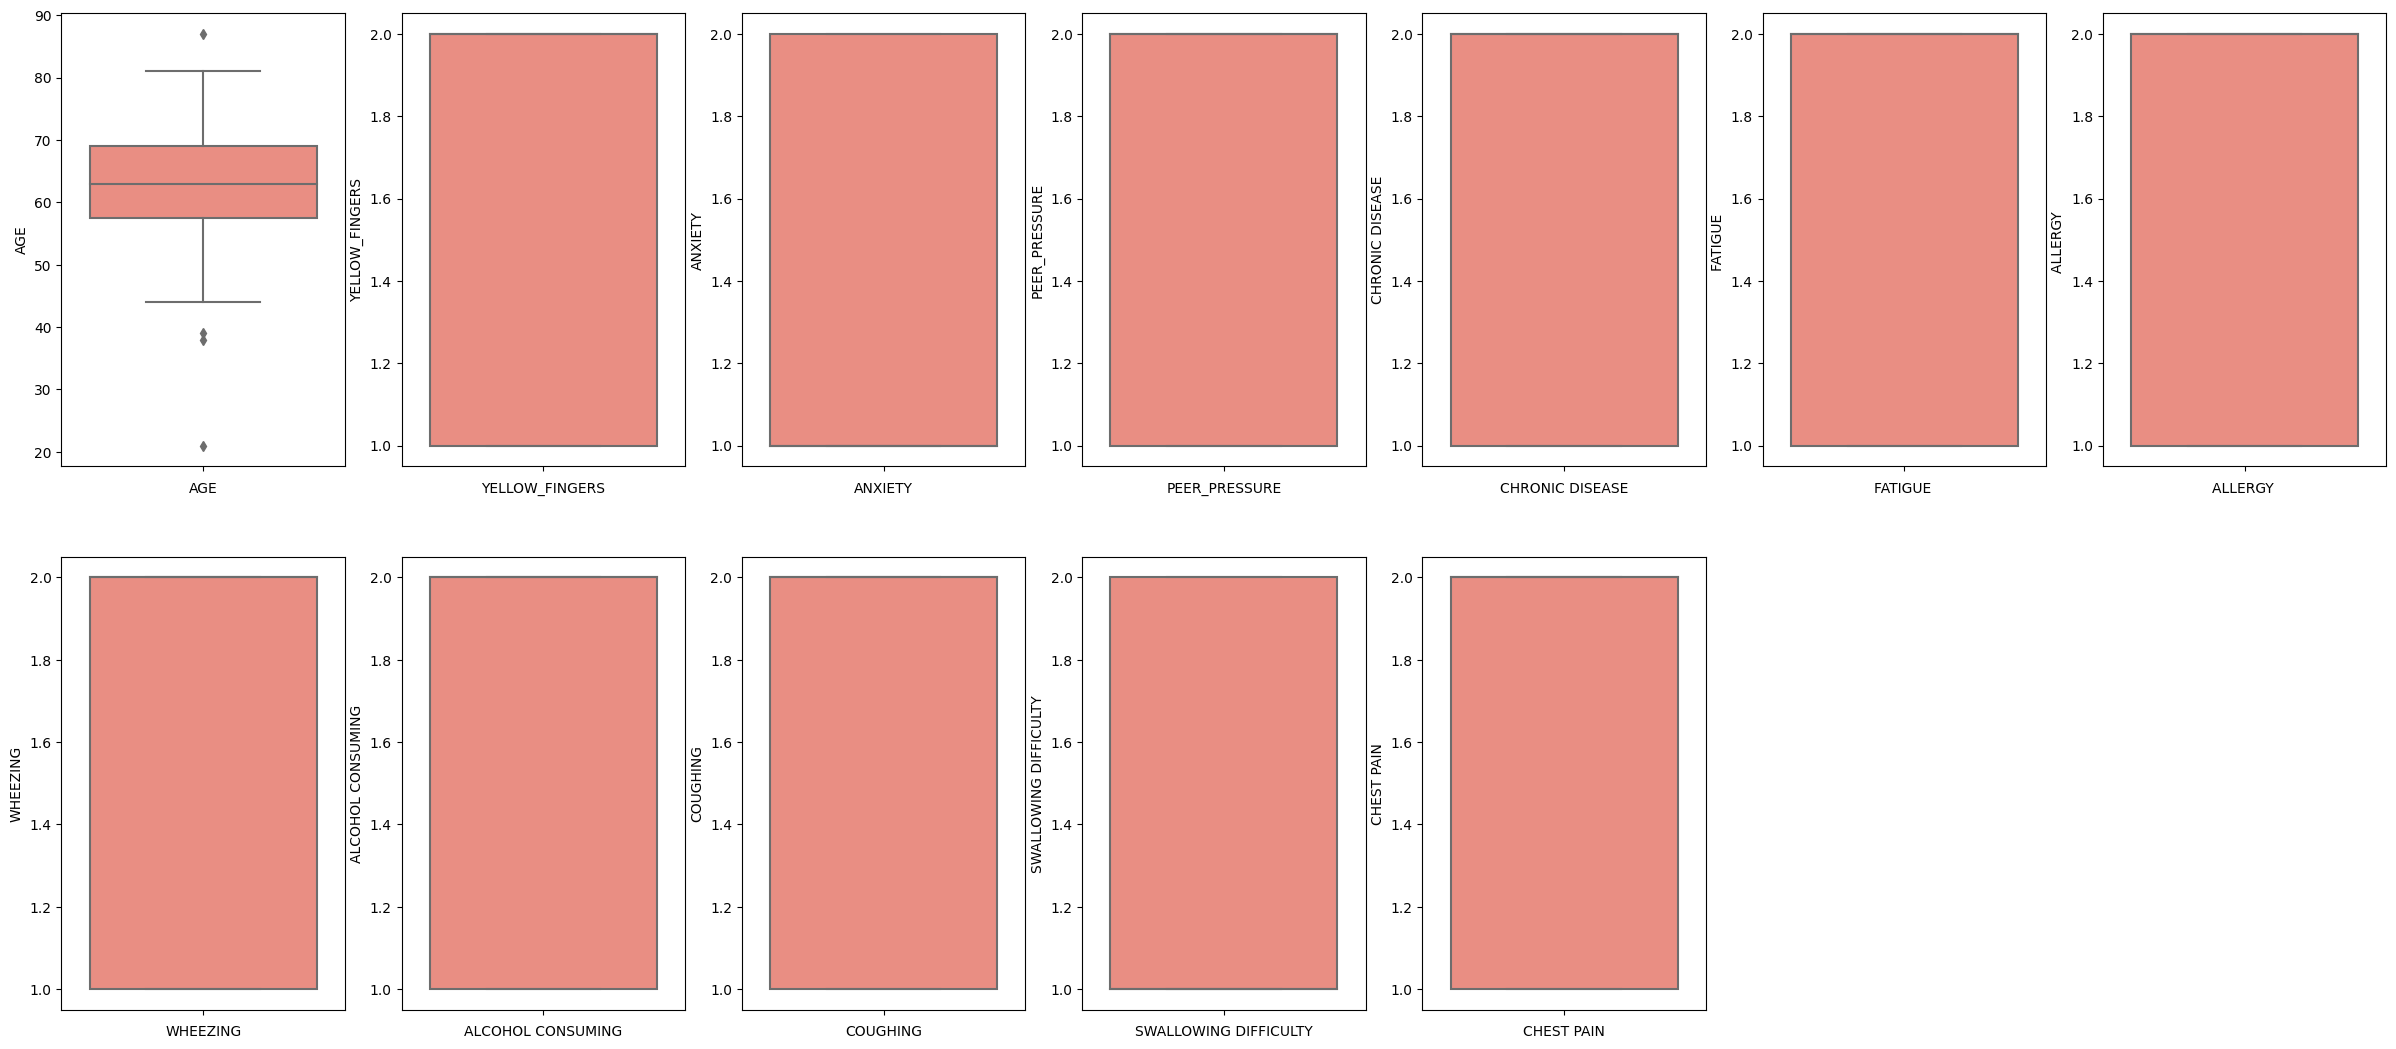

In [796]:
list_column = [ 'AGE','YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']

plt.figure(figsize=(30,20))
features = list_column[:14]
for i in range(0, len(features)):
    plt.subplot(3, 7, i+1)
    sns.boxplot(y=df[features[i]], color='salmon', orient='v')
    plt.xlabel(features[i])

Check outlier in column 'AGE'

In [797]:
def finding_outlier_IQR(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  df_final = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))]
  return df_final

print(finding_outlier_IQR(df['AGE']))

22     21
238    38
261    39
277    87
Name: AGE, dtype: int64


40.25 86.25


<Axes: xlabel='AGE'>

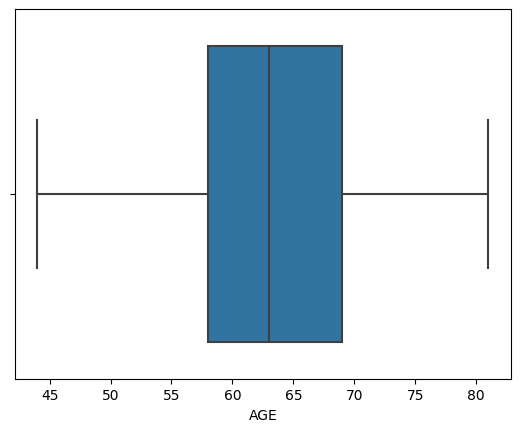

In [798]:
# menentukan batas atas dan bawah
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR  = Q3 - Q1

Lower_bound = Q1-1.5*IQR
Upper_bound = Q3+1.5*IQR
print(Lower_bound,Upper_bound)

# visualisasi setelah handling outlier
New_Age= (df['AGE']>Lower_bound) & (df['AGE']<Upper_bound)
filtered_data= df[New_Age]
sns.boxplot(x='AGE', data=filtered_data)



BALANCING DATA

In [799]:
y = filtered_data['LUNG_CANCER']
X = filtered_data.drop('LUNG_CANCER',axis=1)

for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X

,GENDER,AGE,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN
0,0,69,1,1,0,0,1,0,1,1,1,1,1
1,0,74,0,0,0,1,1,1,0,0,0,1,1
2,1,59,0,0,1,0,1,0,1,0,1,0,1
3,0,63,1,1,0,0,0,0,0,1,0,1,1
4,1,63,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,59,1,1,1,0,0,1,1,0,1,1,0
280,1,59,0,0,0,1,1,1,0,0,0,0,0
281,0,55,0,0,0,0,1,1,0,0,0,0,1
282,0,46,1,1,0,0,0,0,0,0,0,1,1


In [800]:
lung_test = y.value_counts()

# Access the count of 'Yes' and 'No'
lung_y = lung_test[1]
lung_n = lung_test[0]

print("Count of 'Yes':", lung_y)
print("Count of 'No':", lung_n)

Count of 'Yes': 235
Count of 'No': 36


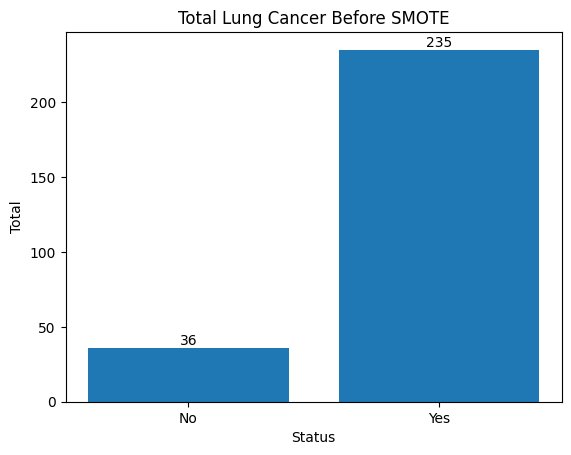

In [801]:
# Create a bar plot
plt.bar(['No', 'Yes'], [lung_n, lung_y])
plt.xlabel('Status')
plt.ylabel('Total')
plt.title('Total Lung Cancer Before SMOTE')

# Add value labels on top of each bar
plt.text(0, lung_n, str(lung_n), ha='center', va='bottom')
plt.text(1, lung_y, str(lung_y), ha='center', va='bottom')

# Display the plot
plt.show()

In [802]:
from imblearn.over_sampling import SMOTE
# Inisialisasi SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Melakukan SMOTE pada data training saja
X, y = smote.fit_resample(X, y)

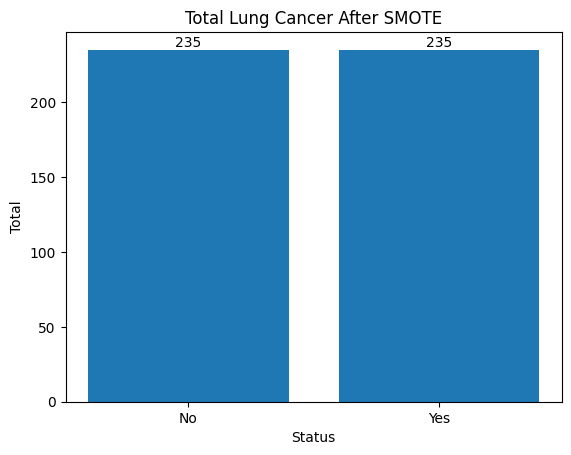

In [803]:
lung_test = y.value_counts()

# Access the count of 'Yes' and 'No'
lung_y = lung_test[1]
lung_n = lung_test[0]

# Create a bar plot
plt.bar(['No', 'Yes'], [lung_n, lung_y])
plt.xlabel('Status')
plt.ylabel('Total')
plt.title('Total Lung Cancer After SMOTE')

# Add value labels on top of each bar
plt.text(0, lung_n, str(lung_n), ha='center', va='bottom')
plt.text(1, lung_y, str(lung_y), ha='center', va='bottom')

# Display the plot
plt.show()

###SPLITTING DATA

In [804]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

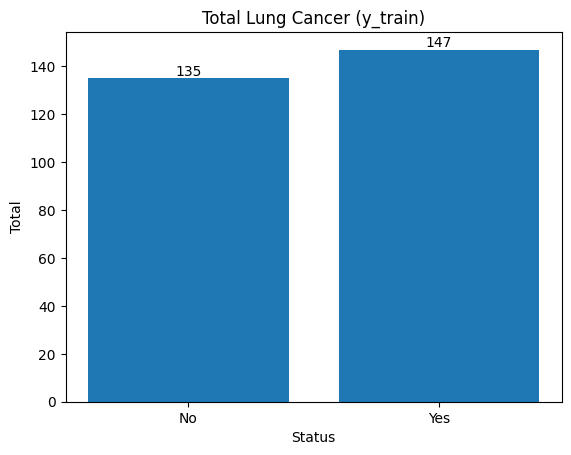

In [805]:
lung_test = y_train.value_counts()

# Access the count of 'Yes' and 'No'
lung_y = lung_test[1]
lung_n = lung_test[0]

# Create a bar plot
plt.bar(['No', 'Yes'], [lung_n, lung_y])
plt.xlabel('Status')
plt.ylabel('Total')
plt.title('Total Lung Cancer (y_train)')

# Add value labels on top of each bar
plt.text(0, lung_n, str(lung_n), ha='center', va='bottom')
plt.text(1, lung_y, str(lung_y), ha='center', va='bottom')

# Display the plot
plt.show()

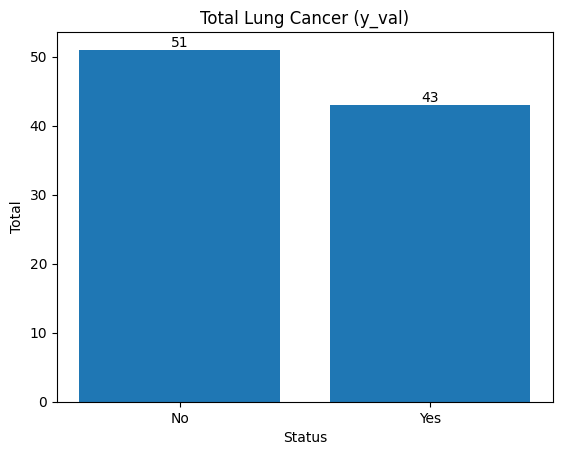

In [806]:
lung_test = y_val.value_counts()

# Access the count of 'Yes' and 'No'
lung_y = lung_test[1]
lung_n = lung_test[0]

# Create a bar plot
plt.bar(['No', 'Yes'], [lung_n, lung_y])
plt.xlabel('Status')
plt.ylabel('Total')
plt.title('Total Lung Cancer (y_val)')

# Add value labels on top of each bar
plt.text(0, lung_n, str(lung_n), ha='center', va='bottom')
plt.text(1, lung_y, str(lung_y), ha='center', va='bottom')

# Display the plot
plt.show()

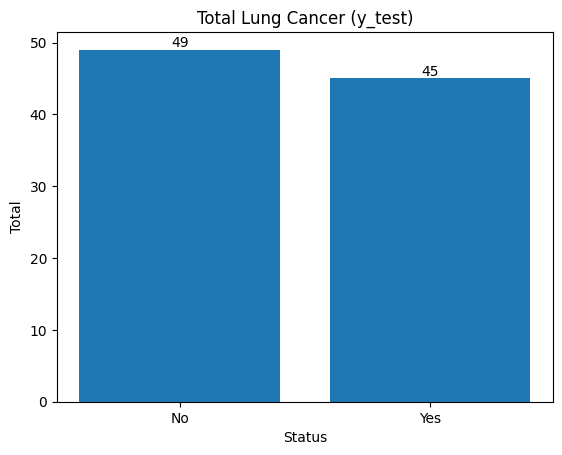

In [807]:
lung_test = y_test.value_counts()

# Access the count of 'Yes' and 'No'
lung_y = lung_test[1]
lung_n = lung_test[0]

# Create a bar plot
plt.bar(['No', 'Yes'], [lung_n, lung_y])
plt.xlabel('Status')
plt.ylabel('Total')
plt.title('Total Lung Cancer (y_test)')

# Add value labels on top of each bar
plt.text(0, lung_n, str(lung_n), ha='center', va='bottom')
plt.text(1, lung_y, str(lung_y), ha='center', va='bottom')

# Display the plot
plt.show()

###FEATURE SCALING

In [808]:
scaler = StandardScaler()
X_train['AGE'] = scaler.fit_transform(X_train[['AGE']])
X_val['AGE'] = scaler.transform(X_val[['AGE']])
X_test['AGE'] = scaler.transform(X_test[['AGE']])

print(scaler.mean_)
print(scaler.var_)

[62.08510638]
[46.0211257]


###MODELLING

In [809]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=[13]),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [810]:
model.build()

In [811]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 15)                210       
                                                                 
 dense_81 (Dense)            (None, 6)                 96        
                                                                 
 dense_82 (Dense)            (None, 2)                 14        
                                                                 
 dense_83 (Dense)            (None, 1)                 3         
                                                                 
Total params: 323 (1.26 KB)
Trainable params: 323 (1.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [812]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# history = model.fit(X_train, y_train,
#                         epochs=100, batch_size=16,
#                         validation_data=(X_val, y_val),
#                         shuffle=True)

history = model.fit(X_train, y_train,
                    epochs=100, batch_size=16,
                    validation_data=(X_val, y_val),
                    shuffle=True)


Epoch 1/100
18/18 [==============================] - 1s 16ms/step - loss: 0.6419 - accuracy: 0.5922 - val_loss: 0.6401 - val_accuracy: 0.5957
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6113 - accuracy: 0.6170 - val_loss: 0.6099 - val_accuracy: 0.6064
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 0.5800 - accuracy: 0.6312 - val_loss: 0.5796 - val_accuracy: 0.5957
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5505 - accuracy: 0.6525 - val_loss: 0.5505 - val_accuracy: 0.6277
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 0.5223 - accuracy: 0.7340 - val_loss: 0.5250 - val_accuracy: 0.7660
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.4983 - accuracy: 0.7730 - val_loss: 0.5031 - val_accuracy: 0.7660
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.4778 - accuracy: 0.8014 - val_loss: 0.4838 - val_accuracy: 0.8404
Epoch 8/100


###EVALUATE

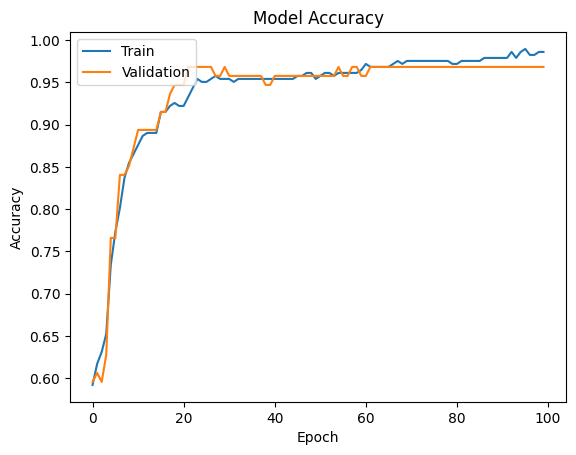

In [813]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')

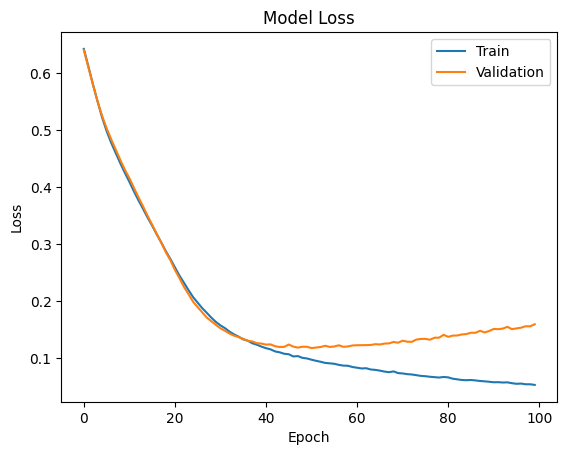

In [814]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')

In [815]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

3/3 [==============================] - 0s 6ms/step - loss: 0.0835 - accuracy: 0.9681
Test loss: 0.08349497616291046
Test accuracy: 0.9680851101875305


3/3 [==============================] - 0s 3ms/step

Confusion Matrix


Text(50.722222222222214, 0.5, 'True')

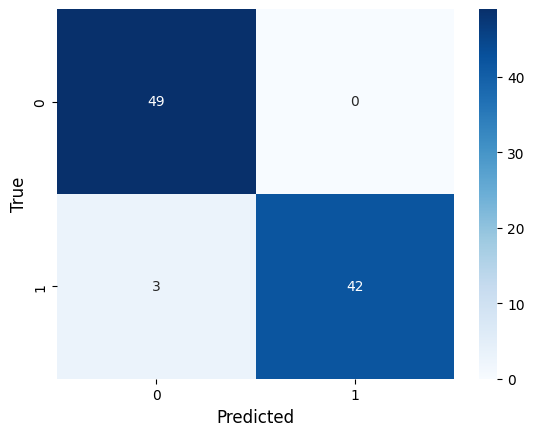

In [816]:
# from sklearn.metrics import precision_recall_fscore_support
y_true = y_test
y_pred = model.predict(X_test)

# Make the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true.round(), y_pred.round())
print("\nConfusion Matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [817]:
print(classification_report(y_true.round(),y_pred.round()))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        49
           1       1.00      0.93      0.97        45

    accuracy                           0.97        94
   macro avg       0.97      0.97      0.97        94
weighted avg       0.97      0.97      0.97        94



###SAVE MODEL

In [818]:
# !mkdir -p saved_model
# model.save('saved_model/my_model')

In [819]:
model.save('lung_model.h5')
# import pickle
# pickle.dump(model, open("model.pkl", "wb"))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [820]:
# import joblib
# from keras.models import load_model
# model_keras = load_model('lung_model.h5')  # Gantilah dengan nama file yang sesuai

# # Simpan model Keras dalam format joblib (.pkl)
# file_path = 'lung_model.pkl'  # Ganti dengan nama file yang kamu inginkan
# joblib.dump(model_keras, file_path)

In [821]:
# from google.colab import files

# files.download('saved_model/my_model/variables/variables.data-00000-of-00001')
# files.download('saved_model/my_model/variables/variables.index')
# files.download('saved_model/my_model/fingerprint.pb')
# files.download('saved_model/my_model/keras_metadata.pb')
# files.download('saved_model/my_model/saved_model.pb')

In [822]:
# files.download('lung_model.h5')

In [823]:
# new_model = tf.keras.models.load_model('lung_model.h5')

In [824]:
# loss, acc = new_model.evaluate(X_test, y_test)
# print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

In [825]:
# #Manual Scale
# mean = 63.014 #[63.01428571]
# vari = 43.499 #[43.49979592]
# input_x = 63
# scale_final = (input_x - mean) / vari

# print(scale_final)

In [826]:
# X_new = [[1,-0.000321,1,0,0,0,0,0,1,0,1,0,0]]
# new_model.predict(X_new)

# # 1 - POSITIVE
# # 0 - NEGATIVE